# Дипломная работа по Python
**Выполнил: Шармашкеев Б.В.**

**Группа: pyda-13**

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

## Задание 1
Загрузка данных из файла *hr.csv*

Описание столбцов:
1. **satisfaction_level** - Уровень удовлетворенности работой
2. **Last_evaluation** - Время с момента последней оценки в годах
3. **number_projects** - Количество проектов, выполненных за время работы
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
5. **time_spend_company** - Стаж работы в компании в годах
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. **left** - уволился ли сотрудник
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
9. **department** - отдел в котором работает сотрудник
10. **salary** - относительный уровень зарплаты


In [3]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Задание 2
Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

#### 2.1. Основные статистические характеристики

In [5]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### 2.2. Расчет моды для всех столбцов

In [6]:
for col in hr.columns:
    modes = hr[col].mode()[0]
    print(f'{col} - {modes}')

satisfaction_level - 0.1
last_evaluation - 0.55
number_project - 4
average_montly_hours - 135
time_spend_company - 3
Work_accident - 0
left - 0
promotion_last_5years - 0
department - sales
salary - low


## Задание 3
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.


In [7]:
hr_qty = hr[['last_evaluation', 'number_project', 'average_montly_hours',
    'time_spend_company', 'Work_accident', 'promotion_last_5years']]
corrM = hr_qty.corr(method='kendall')
corrM

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
last_evaluation,1.000000,0.266267,0.235374,0.118842,-0.004749,-0.005903
number_project,0.266267,1.000000,0.306987,0.195025,0.002096,-0.002666
average_montly_hours,0.235374,0.306987,1.000000,0.119466,-0.004966,-0.002417
time_spend_company,0.118842,0.195025,0.119466,1.000000,-0.024839,0.032059
Work_accident,-0.004749,0.002096,-0.004966,-0.024839,1.000000,0.039245
promotion_last_5years,-0.005903,-0.002666,-0.002417,0.032059,0.039245,1.000000


Для построения корреляционной матрицы выбран метод Кендалла, так как распределение переменных не является нормальным.
1. Наиболее скоррелированные переменные: **average_monthly_hours** и **number_project**
2. Наименее скоррелированные переменные: **number_project** и **Work_accident**

## Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте.


In [8]:
hr[['department', 'salary']].groupby('department').count().rename(columns={'salary': 'employees_counter'})

,employees_counter
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


## Задание 5
Показать распределение сотрудников по зарплатам. Рассчитайте сколько сотрудников работает в каждом департаменте.


In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [10]:
hr.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [11]:
hr.loc[(hr.salary == 'low'), 'salary_numeric'] = 1
hr.loc[(hr.salary == 'medium'), 'salary_numeric'] = 2
hr.loc[(hr.salary == 'high'), 'salary_numeric'] = 3
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,salary_numeric
0,0.38,0.53,2,157,3,0,1,0,sales,low,1.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,1.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1.0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,1.0
14995,0.37,0.48,2,160,3,0,1,0,support,low,1.0
14996,0.37,0.53,2,143,3,0,1,0,support,low,1.0
14997,0.11,0.96,6,280,4,0,1,0,support,low,1.0


[Text(1, 0, 'low'), Text(2, 0, 'medium'), Text(3, 0, 'high')]

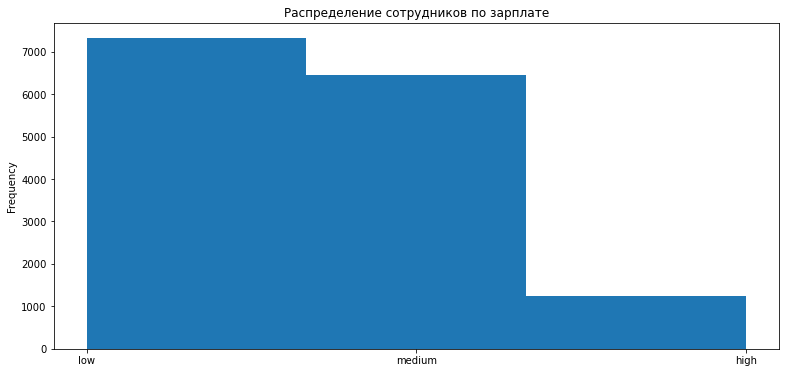

In [13]:
ax = hr.salary_numeric.plot(kind='hist', 
                       bins=3,
                       title='Распределение сотрудников по зарплате')
ax.set_xticks([1,2,3])
ax.set_xticklabels(hr.salary.unique())

## Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности


In [14]:
import matplotlib.pyplot as plt

In [15]:
departments = list(hr.department.unique())
departments

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

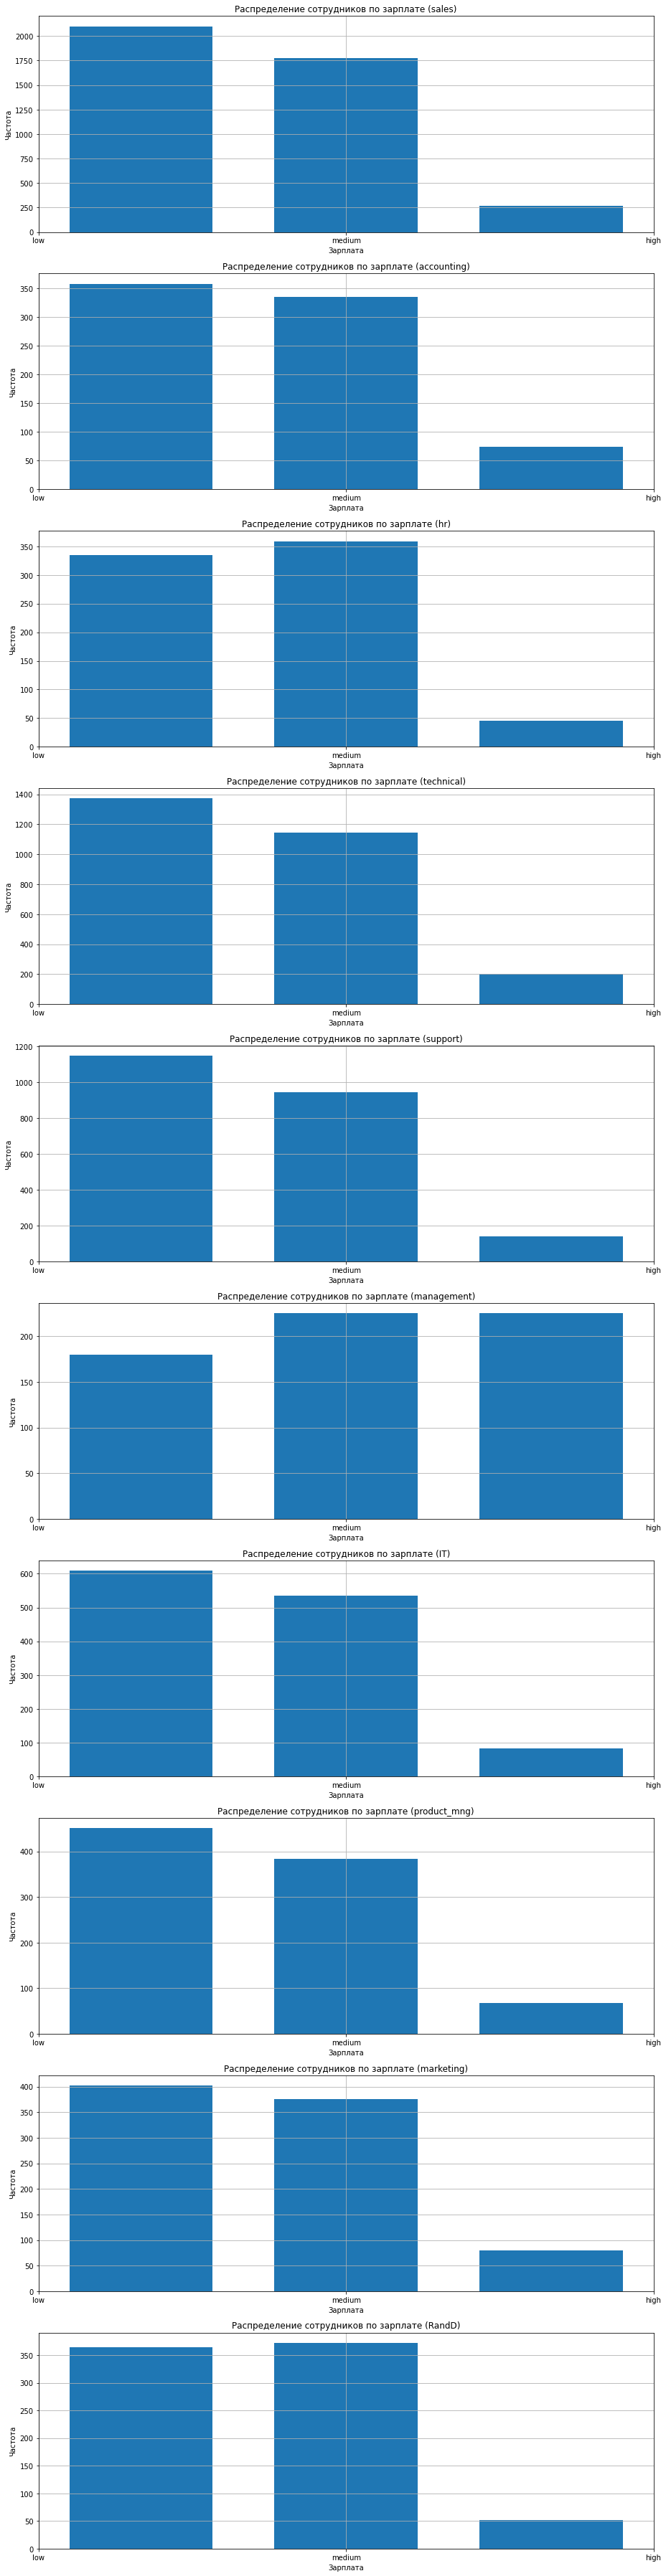

In [17]:
departments = list(hr.department.unique())
fig, axes = plt.subplots(10,1, figsize=(13,50))

for i, dep in enumerate(departments):
    hr.loc[hr.department==dep].hist(column='salary_numeric',
                                   bins=3,
                                   ax=axes[i],
                                   sharey=True,
                                   rwidth=0.7)
    axes[i].set_title(f"Распределение сотрудников по зарплате ({dep})")
    axes[i].set_xlabel('Зарплата')
    axes[i].set_ylabel('Частота')
    axes[i].set_xticks([1,2,3])
    axes[i].set_xticklabels(hr.salary.unique())

fig.tight_layout()

## Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


[Text(1, 0, 'low'), Text(2, 0, 'medium'), Text(3, 0, 'high')]

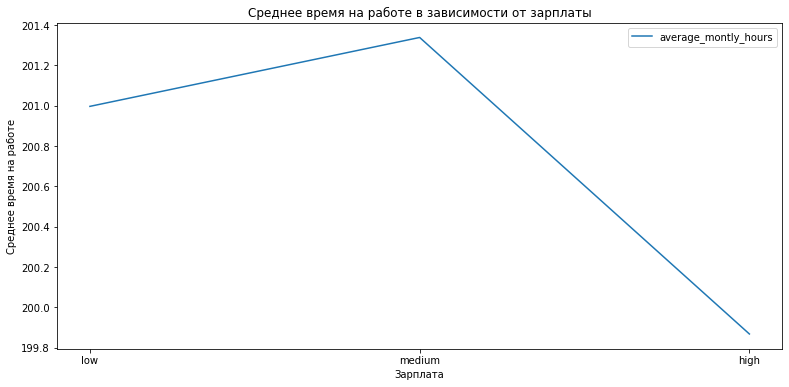

In [24]:
ax = hr[['average_montly_hours', 'salary_numeric']].groupby('salary_numeric').mean() \
    .plot(title='Среднее время на работе в зависимости от зарплаты',
          xlabel='Зарплата', 
          ylabel='Среднее время на работе')
ax.set_xticks([1,2,3])
ax.set_xticklabels(hr.salary.unique())

На графике наглядно представлено отсутствие прямой связи между уровнем зарплаты и количеством проведенного времени на работе.
Гипотеза в задании не подтверждается.

## Задание 8
Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов


In [18]:
promoted_count = hr[['left', 'promotion_last_5years']].loc[hr.promotion_last_5years > 0].groupby('left').count()
l = promoted_count.promotion_last_5years.loc[0]/promoted_count.promotion_last_5years.sum()
nl= promoted_count.promotion_last_5years.loc[1]/promoted_count.promotion_last_5years.sum()
print(f"Доля сотрудников с повышением за последние 5 лет, которые не уволились: {l: .0%}")
print(f"Доля сотрудников с повышением за последние 5 лет, которые уволились: {nl: .0%}")

Доля сотрудников с повышением за последние 5 лет, которые не уволились:  94%
Доля сотрудников с повышением за последние 5 лет, которые уволились:  6%


In [19]:
mean_satisfaction = hr[['left', 'satisfaction_level']].groupby('left').mean()
print(f"Средняя степень удовлетворенности сотрудников, которые не уволились: {mean_satisfaction.satisfaction_level.loc[0]}")
print(f"Средняя степень удовлетворенности сотрудников, которые уволились: {mean_satisfaction.satisfaction_level.loc[1]}")

Средняя степень удовлетворенности сотрудников, которые не уволились: 0.666809590479516
Средняя степень удовлетворенности сотрудников, которые уволились: 0.44009801176140917


In [20]:
mean_projects = hr[['left', 'number_project']].groupby('left').mean()
print(f"Среднее кол.-во проектов сотрудников, которые не уволились: {mean_projects.number_project.loc[0]}")
print(f"Среднее кол.-во проектов сотрудников, которые уволились: {mean_projects.number_project.loc[1]}")

Среднее кол.-во проектов сотрудников, которые не уволились: 3.786664333216661
Среднее кол.-во проектов сотрудников, которые уволились: 3.8555026603192384


## Задание 9
Разделить данные на тестовую и обучающую выборки.
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
Оценить качество модели на тестовой выборки

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [22]:
data = hr.drop(columns=['department', 'salary', 'left', 'salary_numeric'])
data_class = np.array(hr['left'])

Распределение данных в столбцах с клличественными признаками


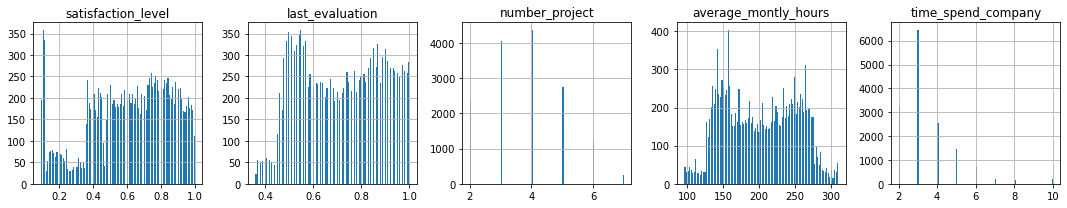

In [40]:
fig, axes = plt.subplots(1, 5, figsize=(15,3))
print('Распределение данных в столбцах с клличественными признаками')
for i, col in enumerate(data.drop(columns=['Work_accident', 'promotion_last_5years']).columns):
    data.drop(columns=['Work_accident', 'promotion_last_5years']).hist(column=col,
                                   bins=100,
                                   ax=axes[i],
                                   sharey=True,
                                   rwidth=0.7)
    
    
fig.tight_layout()

1. Распределение данных в столюцах ненормальное
2. Признаки 'Work_accident', 'promotion_last_5years' - категориальные

Для модели LDA признаки должны быть непрерывными, а распределение данных желательно нормальное.
Проверим 2 модели: 

In [128]:
len(data_class)

14999

In [119]:
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.2)

In [121]:
lda = LinearDiscriminantAnalysis()

In [133]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

#### Построение модели без категориальных признаков

In [170]:
# Для чистоты эксперимента, данные для модели без признаков 'Work_accident' и 'promotion_last_5years'
# Формируем на основе X и y первой модели
X2_train = X_train.drop(columns=['Work_accident', 'promotion_last_5years'])
X2_test = X_test.drop(columns=['Work_accident', 'promotion_last_5years'])
y2_train = y_train
y2_test = y_test

In [123]:
lda2 = LinearDiscriminantAnalysis()

In [134]:
lda2.fit(X2_train, y2_train)

LinearDiscriminantAnalysis()

In [135]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(y_test, lda.predict(X_test), target_names=['Stay', 'Left']))

              precision    recall  f1-score   support

        Stay       0.79      0.93      0.85      2255
        Left       0.53      0.24      0.33       745

    accuracy                           0.76      3000
   macro avg       0.66      0.59      0.59      3000
weighted avg       0.72      0.76      0.72      3000



In [137]:
print(classification_report(y2_test, lda2.predict(X2_test), target_names=['Stay', 'Left']))

              precision    recall  f1-score   support

        Stay       0.79      0.93      0.85      2255
        Left       0.53      0.24      0.33       745

    accuracy                           0.76      3000
   macro avg       0.66      0.58      0.59      3000
weighted avg       0.72      0.76      0.72      3000



В обоих случаях метрики на одинаковом уровне. Поэтому в данном случае стоит использовать модель без категориальных признаков.

In [140]:
hr[['left', 'satisfaction_level']].groupby('left').count()

,satisfaction_level
left,
0,11428
1,3571


Изначально имеем несбалансированные классы.

Возможно улучшить модель позволит тонкая настройка алгоритма, выборка для получения сбалансированного датасета или применение других алгоритмов машиннного обучения.

In [161]:
# Создадим сбалансированную выборку
u_hr = pd.concat([hr[hr['left']==0].sample(n=3571), hr[hr['left']==1]])
u_hr[['left', 'satisfaction_level']].groupby('left').count()

,satisfaction_level
left,
0,3571
1,3571


In [162]:
u_data = u_hr.drop(columns=['department', 'salary', 'left', 'salary_numeric'])
u_data_class = np.array(u_hr['left'])

In [164]:
X3_train, X3_test, y3_train, y3_test = train_test_split(u_data, u_data_class, test_size=0.2)

In [165]:
lda3 = LinearDiscriminantAnalysis()

In [168]:
lda3.fit(X3_train, y3_train)

LinearDiscriminantAnalysis()

In [169]:
print(classification_report(y3_test, lda3.predict(X3_test), target_names=['Stay', 'Left']))

              precision    recall  f1-score   support

        Stay       0.74      0.73      0.73       723
        Left       0.73      0.74      0.73       706

    accuracy                           0.73      1429
   macro avg       0.73      0.73      0.73      1429
weighted avg       0.73      0.73      0.73      1429



Показатели для уволившихся сотрудников улучшилися. Не смотря на снижение средней точности, на мой взгляд важно правильно предсказывать тех, кто уволится.

Поэтому применение подвыборки имеет смысл.